In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl
from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

color_b = '#C768D8'
color_p = '#47BF55'
color_both = '#000000'
color_either = '#595959'
color_ns = '#BFBFBF'


savefigs = True
figs_dir = '/Users/daniela/Documents/2018/AC_IC_project_2018/Task_engagement_pupil_paper/figures'
path=os.getcwd()

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-02-09 102303.log
[nems_web INFO] No value specified for: DEBUG. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: CSRF_ENABLED. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: CSRF_SESSION_KEY. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: SECRET_KEY. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: PORT. Using default value in nems_web.configs.defaults


In [2]:
def find_sig_cellids(df, state_chan_val='active', condition='pb', sign_type = 'beh'):
    '''it takes a Pandas df as an argument and returns a Pandas series with cellids that are significantly modulated 
    by behavior if sign_type 'beh' according to P
    If sign_type = 'state', then it pulls out untis significantly modulated by either state, pupil or behavior'''
    
    if condition=='pb' and sign_type == 'beh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup0.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup0.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pb' and sign_type == 'ubeh':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup.beh0']
        
    elif condition=='pb' and sign_type == 'upup':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh']
        
    elif condition=='pb' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.pup.beh']-df_r['st.pup0.beh0']
        df_rse['r_sum'] = df_rse['st.pup.beh']+df_rse['st.pup0.beh0']
        
    elif condition=='pp' and sign_type == 'pas':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup0.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pp' and sign_type == 'upas':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup.pas']-df_r['st.pup.pas0']
        df_rse['r_sum'] = df_rse['st.pup.pas']+df_rse['st.pup.pas0']
        
    elif condition=='pp' and sign_type == 'upup':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup.pas']-df_r['st.pup0.pas']
        df_rse['r_sum'] = df_rse['st.pup.pas']+df_rse['st.pup0.pas']
        
    elif condition=='pp' and sign_type == 'state':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup.pas']-df_r['st.pup0.pas0']
        df_rse['r_sum'] = df_rse['st.pup.pas']+df_rse['st.pup0.pas0']
        
        
    elif condition=='pf' and sign_type == 'beh':
        df_state = df[df['state_chan_alt']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')
        
        df_r['r_diff'] = df_r['st.pup0.fil']-df_r['st.pup0.fil0']
        df_rse['r_sum'] = df_rse['st.pup0.fil']+df_rse['st.pup0.fil0']
        
        
    elif condition=='fil' and sign_type == 'state':
        df_state = df[df['state_chan']==state_chan_val]
        
        # Pivot the new df such that you only have r or r_se as data and state_sig as columns
        df_r = df_state.pivot(index='cellid', columns='state_sig', values='r')
        df_rse = df_state.pivot(index='cellid', columns='state_sig', values='r_se')

        df_r['r_diff'] = df_r['st.fil']-df_r['st.fil0']
        df_rse['r_sum'] = df_rse['st.fil']+df_rse['st.fil0']
        
        
    cellid_sig = df_r[df_r['r_diff']>df_rse['r_sum']].index
    
    return cellid_sig

In [3]:
def one_state(df, col_idx='MI', state='only', state_chan_val='active', state_sig1='st.pup0.beh', state_sig2='st.pup0.beh0',
             condition='pb', absolute=None, columns_to_keep=None):
    '''it takes a dataframe and a column_index and it returns two dfs with the difference between the values of 
    the column index one for all cells one for significant cells. e.g. for MI, MIbeh = MIpup0beh-MIpup0beh0.
    if absolute is set to 1, then there will be another column with col_idx absolute value'''
    
    if condition=='pb':
        df_state = df[df['state_chan']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan', values=col_idx)
    
    elif condition=='pp' or condition=='pf' or condition=='fil':
        df_state = df[df['state_chan_alt']==state_chan_val]
    
        df_ss1 = df_state[df_state['state_sig']==state_sig1]
        df_ss2 = df_state[df_state['state_sig']==state_sig2]
    
        # pivot model 1 and 2 to have the column_index for each state_chan
        df_ss1_col_idx = df_ss1.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        df_ss2_col_idx = df_ss2.pivot(index='cellid', columns='state_chan_alt', values=col_idx)
        
    
    #change name of column to prepare for merging
    df_ss2_col_idx = df_ss2_col_idx.rename(index=str, columns={state_chan_val:state_chan_val+'0'})
    
    #reset index to get rid of multindexing in model 1 and 2
    df_ss1_col_idx = df_ss1_col_idx.reset_index()
    df_ss2_col_idx = df_ss2_col_idx.reset_index()
    
    # join dataframes
    df_col_idx_state = pd.merge(df_ss1_col_idx, df_ss2_col_idx, how='left', on='cellid')
    
    # add column with difference between state_chan and state_chan0
    df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state] = df_col_idx_state[state_chan_val]-df_col_idx_state[state_chan_val+'0']
    
    # set the index back to cellid to apply the loc method and get the significant cells
    df_col_idx_state = df_col_idx_state.set_index('cellid')
    
    # if absolute is set to 1, then there will be another column with col_idx absolute value
    if absolute==1:
        df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state+'_abs'] = abs(df_col_idx_state[col_idx+'_'+state_chan_val+'_'+state])
    
    #df_col_idx_state = df_col_0idx_state[col_idx+'_'+state_chan_val+'_'+state]
    
    if columns_to_keep:
        # Initialize empty columns to keep all to false
        for col in columns_to_keep:
            df_col_idx_state[col] = None
        # Now fill those columns with the correct values for those cells
        for cellid in df_col_idx_state.index.values.tolist():
            matching_rows =  df[df['cellid'] == cellid]
            # print(matching_rows)
            # print(matching_rows.iloc[0])
            #print(matching_rows.iloc[0][col])
            for col in columns_to_keep:
                df_col_idx_state.at[cellid, col] = matching_rows.iloc[0][col]
                
    return df_col_idx_state

In [4]:
def scatter_states(df1, df2, column1, column2, brain_region, xlim, ylim, dot_size1=2, dot_size2=4, title='scatter_states',
                   margin=True, bins=None):
    '''The basics of this function takes two data frames and specific columns for each data frame
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units.
    
    If margin=True, it will plot the marginal distributions'''
    
    sns.set(style="white")

    # Plot non-significant cells first
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==False)]
    print('not sig n = {}'.format(len(subset_df1)))
    color = color_ns
    scatplot = sns.JointGrid(x=subset_df1[column1], y=subset_df2[column2], xlim=xlim, ylim=ylim)
    scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1, linewidth=0.3)

    # Plot the significant ubeh or upup cells
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==True)]
    print('ubeh or upup n = {}'.format(len(subset_df1)))
    color = color_either
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_ubeh cells
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==False)]
    print('ubeh n = {}'.format(len(subset_df1)))
    color = color_b
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_upup cells 
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==True)]
    print('upup n = {}'.format(len(subset_df1)))
    color = color_p
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot the significant both pup and beh
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==True)]
    print('ubeh and upup = {}'.format(len(subset_df1)))
    color = color_both
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    
    # scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)

    
#     if df2_sig is None:
#         scatplot = sns.scatterplot(x=df1[column1], y=df2[column2], alpha=1, color=color, size=dot_size1)
#         plt.xlim(xlim)
#         plt.ylim(ylim)
#         scatplot.set_aspect('equal')
        
#     elif df2_sig is not None and margin == False:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         # Plot the cells
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
        
#     elif df2_sig is not None and margin == True:
#         scatplot = sns.JointGrid(x=df1[column1], y=df2[column2], xlim = xlim, ylim = ylim)
#         scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1)
#         scatplot.ax_joint.scatter(df1_sig[column1], df2_sig[column2], color=color_sig, edgecolor='white', s=dot_size2)
         
#         _ = scatplot.ax_marg_x.hist(df1[column1], color=color, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2[column2], color=color, edgecolor='white', alpha=1, orientation='horizontal', bins=bins)
        
#         _ = scatplot.ax_marg_x.hist(df1_sig[column1], color=color_sig, edgecolor='white', alpha=1, bins=bins)
#         _ = scatplot.ax_marg_y.hist(df2_sig[column2], color=color_sig, edgecolor='white', alpha=1, orientation='horizontal',
#                                    bins=bins)
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')

    # need a slope and c to fix the position of line
    slope = 1
    c = xlim[0]

    x_min = xlim[0]
    x_max = xlim[1]
    y_min, y_max = c, c + slope*(x_max-x_min)
    plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    
    plt.xlabel(brain_region+'_'+column1)
    plt.ylabel(brain_region+'_'+column2) 
    
    plt.savefig(brain_region+'_'+column1+column2+title+'.pdf')

In [29]:
def scatter_states(df1, df2, column1, column2, brain_region, xlim, ylim, dot_size1=2, dot_size2=4, title='scatter_states',
                   margin=True, bins=None):
    '''The basics of this function takes two data frames and specific columns for each data frame
    (eg 'MI_active_only' or 'R2_active_unique') and plots the scatter plot between those and the significant units.
    
    If margin=True, it will plot the marginal distributions'''
    
    sns.set(style="white")

    # Plot non-significant cells first
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==False)]
    print('not sig n = {}'.format(len(subset_df1)))
    color = color_ns
    scatplot = sns.JointGrid(x=subset_df1[column1], y=subset_df2[column2], xlim=xlim, ylim=ylim)
    scatplot = scatplot.plot_joint(plt.scatter, color=color, edgecolor="white", s=dot_size1, linewidth=0.3)

    # Plot the significant ubeh or upup cells
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==False) & (df1['sig_state']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==False) & (df1['sig_state']==True)]
    print('ubeh or upup n = {}'.format(len(subset_df1)))
    color = '#595959'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_ubeh cells
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==False)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==False)]
    print('ubeh n = {}'.format(len(subset_df1)))
    color = '#82418B'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot sig_upup cells 
    subset_df1 = df1[(df1['sig_ubeh']==False) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==False) & (df2['sig_upup']==True)]
    print('upup n = {}'.format(len(subset_df1)))
    color = '#2E7E3E'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    # Plot the significant both pup and beh
    subset_df1 = df1[(df1['sig_ubeh']==True) & (df1['sig_upup']==True)]
    subset_df2 = df2[(df2['sig_ubeh']==True) & (df2['sig_upup']==True)]
    print('ubeh and upup = {}'.format(len(subset_df1)))
    color = 'black'
    scatplot.ax_joint.scatter(subset_df1[column1], subset_df2[column2], color=color, s=dot_size2, edgecolor='white', linewidth=0.3)
    
    
    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')

    # need a slope and c to fix the position of line
    slope = 1
    c = xlim[0]

    x_min = xlim[0]
    x_max = xlim[1]
    y_min, y_max = c, c + slope*(x_max-x_min)
    plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
    
    plt.xlabel(brain_region+'_'+column1)
    plt.ylabel(brain_region+'_'+column2) 
    
    plt.savefig(brain_region+'_'+column1+column2+title+'.pdf')

In [30]:
# A1 SUA+MUA: pup vs. passive 307 per state dataframe
d_pp307 = pd.read_csv('d_pp307.csv') # updated to sdexp model run on Jan 15, 2019
d_pp307 = d_pp307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pp307['R2'] = d_pp307['r']**2

In [31]:
#A1 SUA+MUA: pup vs. beh 307 per state dataframe 
d_pb307 = pd.read_csv('d_307_pb_updated.csv') #model s_sdexp.S rerun January 5 by SVD
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb307['R2'] = d_pb307['r']**2 * np.sign(d_pb307['r'])

In [32]:
d_pp307.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2
0,BRT039c-25-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,95.0,0.653687,0.019939,0.021312,1.041525,baseline,0.427307
1,BRT039c-25-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,pupil,0.011212,95.0,0.653687,0.019939,-0.019485,-0.085180,pupil,0.427307
2,BRT039c-25-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT039c07_p_PTD,0.003108,95.0,0.653687,0.019939,0.078495,-0.178006,PASSIVE_1,0.427307
3,BRT039c-25-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT039c09_p_PTD,0.003375,95.0,0.653687,0.019939,0.120109,-0.325959,PASSIVE_2,0.427307
4,BRT039c-03-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,95.0,0.561822,0.025590,-0.009236,0.908014,baseline,0.315644


In [33]:
cellid_sig_307_beh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'beh')

In [34]:
cellid_sig_307_ubeh = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'ubeh')

In [35]:
cellid_sig_307_upup = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'upup')

In [36]:
cellid_sig_307_state = find_sig_cellids(d_pb307, state_chan_val='active', condition='pb', sign_type = 'state')

In [37]:
# add three columns to original data frame with sign cells per category
#d_pp307['sig_upas'] = d_pp307['cellid'].isin(set(cellid_sig_307_upas))
#d_pp307['sig_upup'] = d_pp307['cellid'].isin(set(cellid_sig_307_upup))
#d_pp307['sig_state'] = d_pp307['cellid'].isin(set(cellid_sig_307_state))

In [38]:
d_pp307['sig_ubeh'] = d_pb307['cellid'].isin(set(cellid_sig_307_ubeh))
d_pp307['sig_upup'] = d_pb307['cellid'].isin(set(cellid_sig_307_upup))
d_pp307['sig_state'] = d_pb307['cellid'].isin(set(cellid_sig_307_state))

In [39]:
# use one_state funciton to pull a dataframe containing MIpas unique, wich is the difference between MIpupbeh and MIpuppas0
d307_MI_pas_unique = one_state(d_pp307, col_idx='MI', state='unique', state_chan_val='PASSIVE_1', 
                               state_sig1='st.pup.pas', state_sig2='st.pup.pas0', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [40]:
# use one_state funciton to pull a dataframe containing MIpup unique, wich is the difference between MIpupbeh and MIpup0beh
d307_MI_pup_unique = one_state(d_pp307, col_idx='MI', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.pas', state_sig2='st.pup0.pas', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

In [41]:
# use one_state funciton to pull a dataframe containing MIbeh, wich is the difference between MIpup0beh and MIpup0beh0
d307_MI_pas_only = one_state(d_pp307, col_idx='MI', state='only', state_chan_val='PASSIVE_1', 
                               state_sig1='st.pup0.pas', state_sig2='st.pup0.pas0', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

not sig n = 68
ubeh or upup n = 20
ubeh n = 8
upup n = 8
ubeh and upup = 3


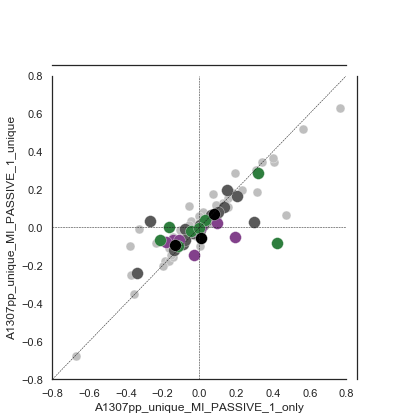

In [42]:
scatter_states(df1=d307_MI_pas_only, 
               df2=d307_MI_pas_unique,
               margin=False, 
               column1='MI_PASSIVE_1_only', 
               column2='MI_PASSIVE_1_unique',
               brain_region='A1307pp_unique', 
               xlim=(-0.8,0.8), ylim=(-0.8,0.8), 
               dot_size1=80, dot_size2=140)

not sig n = 68
ubeh or upup n = 20
ubeh n = 8
upup n = 8
ubeh and upup = 3


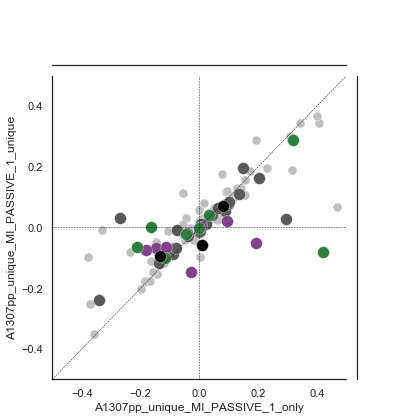

In [43]:
scatter_states(df1=d307_MI_pas_only, 
               df2=d307_MI_pas_unique,
               margin=True, 
               column1='MI_PASSIVE_1_only', 
               column2='MI_PASSIVE_1_unique',
               brain_region='A1307pp_unique', 
               xlim=(-0.5,0.5), ylim=(-0.5,0.5), 
               dot_size1=80, dot_size2=140)

In [44]:
# IC SUA+MUA: pup vs. passive 309 per state dataframe
d_pp309 = pd.read_csv('d_pp309.csv') # updated to sdexp model run on Jan 15, 2019
d_pp309 = d_pp309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pp309['R2'] = d_pp309['r']**2

In [45]:
# IC SUA+MUA: pup vs. beh 309 per state dataframe
d_pb309 = pd.read_csv('d_309_pb_updated.csv')
d_pb309 = d_pb309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb309['R2'] = d_pb309['r']**2 * np.sign(d_pb309['r'])

In [46]:
cellid_sig_309_state = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'state')
cellid_sig_309_ubeh = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'ubeh')
cellid_sig_309_upup = find_sig_cellids(d_pb309, state_chan_val='active', condition='pb', sign_type = 'upup')

In [47]:
d_pp309['sig_ubeh'] = d_pb309['cellid'].isin(set(cellid_sig_309_ubeh))
d_pp309['sig_upup'] = d_pb309['cellid'].isin(set(cellid_sig_309_upup))
d_pp309['sig_state'] = d_pb309['cellid'].isin(set(cellid_sig_309_state))

In [48]:
# use one_state funciton to pull a dataframe containing MIpas unique, wich is the difference between MIpupbeh and MIpuppas0
d309_MI_pas_unique = one_state(d_pp309, col_idx='MI', state='unique', state_chan_val='PASSIVE_1', 
                               state_sig1='st.pup.pas', state_sig2='st.pup.pas0', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

d309_MI_pup_unique = one_state(d_pp309, col_idx='MI', state='unique', state_chan_val='pupil', 
                               state_sig1='st.pup.pas', state_sig2='st.pup0.pas', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

d309_MI_pas_only = one_state(d_pp309, col_idx='MI', state='only', state_chan_val='PASSIVE_1', 
                               state_sig1='st.pup0.pas', state_sig2='st.pup0.pas0', condition='pp',
                               columns_to_keep=['sig_ubeh', 'sig_upup', 'sig_state'])

not sig n = 31
ubeh or upup n = 9
ubeh n = 3
upup n = 11
ubeh and upup = 5


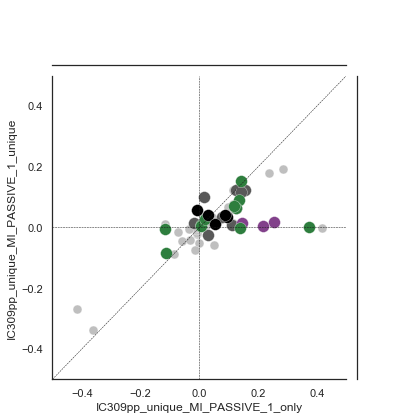

In [49]:
scatter_states(df1=d309_MI_pas_only, 
               df2=d309_MI_pas_unique,
               margin=False, 
               column1='MI_PASSIVE_1_only', 
               column2='MI_PASSIVE_1_unique',
               brain_region='IC309pp_unique', 
               xlim=(-0.5,0.5), ylim=(-0.5,0.5), 
               dot_size1=80, dot_size2=140)

not sig n = 31
ubeh or upup n = 9
ubeh n = 3
upup n = 11
ubeh and upup = 5


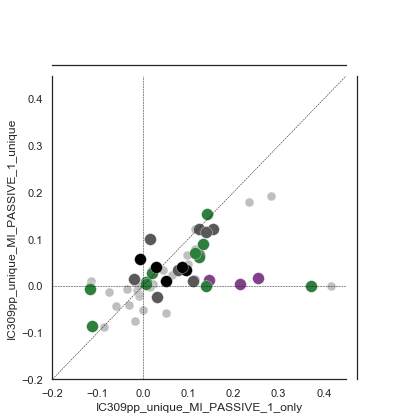

In [50]:
scatter_states(df1=d309_MI_pas_only, 
               df2=d309_MI_pas_unique,
               margin=False, 
               column1='MI_PASSIVE_1_only', 
               column2='MI_PASSIVE_1_unique',
               brain_region='IC309pp_unique', 
               xlim=(-0.2,0.45), ylim=(-0.2,0.45), 
               dot_size1=80, dot_size2=140)

In [58]:
sign_A1 = np.sign((d307_MI_pas_only['MI_PASSIVE_1_only'] + d307_MI_pas_unique['MI_PASSIVE_1_unique'])/2)
signed_diff_A1 = (d307_MI_pas_only['MI_PASSIVE_1_only'] - d307_MI_pas_unique['MI_PASSIVE_1_unique']) * sign_A1

sign_IC = np.sign((d309_MI_pas_only['MI_PASSIVE_1_only'] + d309_MI_pas_unique['MI_PASSIVE_1_unique'])/2)
signed_diff_IC = (d309_MI_pas_only['MI_PASSIVE_1_only'] - d309_MI_pas_unique['MI_PASSIVE_1_unique']) * sign_IC

print(sci.wilcoxon(signed_diff_A1, zero_method='pratt'))
print(sci.wilcoxon(signed_diff_IC, zero_method='pratt'))

print(sci.wilcoxon(d307_MI_pas_only['MI_PASSIVE_1_only'], 
                   d307_MI_pas_unique['MI_PASSIVE_1_unique'], 
                   zero_method='pratt'))

print(sci.wilcoxon(d309_MI_pas_only['MI_PASSIVE_1_only'], 
                   d309_MI_pas_unique['MI_PASSIVE_1_unique'], 
                   zero_method='pratt'))

WilcoxonResult(statistic=1504.0, pvalue=1.6729073898912104e-05)
WilcoxonResult(statistic=309.0, pvalue=1.3761389355681974e-05)
WilcoxonResult(statistic=2519.0, pvalue=0.25015858606393704)
WilcoxonResult(statistic=550.0, pvalue=0.011452760899099112)


In [60]:
print(sci.wilcoxon(abs(d307_MI_pas_only['MI_PASSIVE_1_only']), abs(d307_MI_pas_unique['MI_PASSIVE_1_unique']), zero_method='pratt'))
print(sci.wilcoxon(abs(d309_MI_pas_only['MI_PASSIVE_1_only']), abs(d309_MI_pas_unique['MI_PASSIVE_1_unique']), zero_method='pratt'))

WilcoxonResult(statistic=1497.0, pvalue=1.5159904138013876e-05)
WilcoxonResult(statistic=301.0, pvalue=1.0432089192726048e-05)


In [57]:
A1_median_only = d307_MI_pas_only['MI_PASSIVE_1_only'].median()
print('A1 passive only 1-2 median is {}'.format(A1_median_only))

A1_median_unique = d307_MI_pas_unique['MI_PASSIVE_1_unique'].median()
print('A1 passive unique 1-2 median is {}'.format(A1_median_unique))


IC_median_only = d309_MI_pas_only['MI_PASSIVE_1_only'].median()
print('IC passive only 1-2 median is {}'.format(IC_median_only))

IC_median_unique = d309_MI_pas_unique['MI_PASSIVE_1_unique'].median()
print('IC passive unique 1-2 median is {}'.format(IC_median_unique))

A1 passive only 1-2 median is 0.007045755254585737
A1 passive unique 1-2 median is 0.021632999621473956
IC passive only 1-2 median is 0.030699957462338594
IC passive unique 1-2 median is 0.011066176897131345


In [66]:
sign_A1 = np.sign((d307_MI_pas_unique['MI_PASSIVE_1_unique'] + d307_MI_pas_only['MI_PASSIVE_1_only'])/2)

sign_IC = np.sign((d309_MI_pas_unique['MI_PASSIVE_1_unique'] + d309_MI_pas_only['MI_PASSIVE_1_only'])/2)

signed_only_A1 = d307_MI_pas_only['MI_PASSIVE_1_only'] * sign_A1
print('A1 passive only 1-2 signed mean is {}'.format(signed_only_A1.mean()))

signed_unique_A1 = d307_MI_pas_unique['MI_PASSIVE_1_unique'] * sign_A1
print('A1 passive unique 1-2 signed mean is {}'.format(signed_unique_A1.mean()))

signed_only_IC = d309_MI_pas_only['MI_PASSIVE_1_only'] * sign_IC
print('IC passive only 1-2 signed mean is {}'.format(signed_only_IC.mean()))     
      
signed_unique_IC = d309_MI_pas_unique['MI_PASSIVE_1_unique'] * sign_IC
print('IC passive unique 1-2 signed mean is {}'.format(signed_unique_IC.mean()))  

ratio_A1 = (signed_unique_A1 / signed_only_A1).median()
ratio_IC = (signed_unique_IC / signed_only_IC).median()

print(ratio_A1)
print(ratio_IC)

A1 passive only 1-2 signed mean is 0.14033815199314958
A1 passive unique 1-2 signed mean is 0.10403926683375145
IC passive only 1-2 signed mean is 0.10047915700454926
IC passive unique 1-2 signed mean is 0.05186996254070607
0.8270609471365746
0.5234590077853104


In [63]:
sign_A1


cellid
BRT026c-02-1    1.0
BRT026c-05-2    1.0
BRT026c-07-1   -1.0
BRT026c-17-1   -1.0
BRT026c-20-1   -1.0
BRT033b-02-1    1.0
BRT033b-03-1    1.0
BRT033b-09-1    1.0
BRT033b-12-1    1.0
BRT033b-12-2    1.0
BRT033b-13-1   -1.0
BRT033b-14-1   -1.0
BRT033b-15-1   -1.0
BRT033b-33-1    1.0
BRT033b-41-1   -1.0
BRT033b-45-1    1.0
BRT033b-47-1   -1.0
BRT033b-50-1   -1.0
BRT033b-50-2    1.0
BRT033b-55-1   -1.0
BRT034f-02-1    1.0
BRT034f-07-1    1.0
BRT034f-33-1    1.0
BRT034f-34-1    1.0
BRT036b-01-1    1.0
BRT036b-06-1   -1.0
BRT036b-07-1   -1.0
BRT036b-07-2    1.0
BRT036b-10-1   -1.0
BRT036b-11-1    1.0
               ... 
TAR010c-21-1    1.0
TAR010c-21-2    1.0
TAR010c-22-1   -1.0
TAR010c-24-1   -1.0
TAR010c-27-1    1.0
TAR010c-27-2    1.0
TAR010c-30-1    1.0
TAR010c-33-1    1.0
TAR010c-33-2    1.0
TAR010c-35-1   -1.0
TAR010c-38-1   -1.0
TAR010c-43-1   -1.0
TAR010c-44-1   -1.0
TAR010c-52-1    1.0
TAR010c-54-1    1.0
TAR010c-58-1    1.0
TAR010c-60-1    1.0
bbl102d-01-1    1.0
bbl102d-13-1 